#Session 36. Evaluation metrics and model selection

## Read dataset

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/healthcare-dataset-stroke-data.csv', delimiter = ",")
df.head()
#df.columns

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


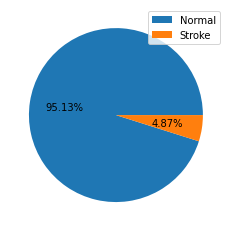

In [3]:
import matplotlib.pyplot as plt
plt.pie(df['stroke'].value_counts(), autopct='%1.2f%%')
plt.legend(['Normal', 'Stroke'])
plt.show()

In [11]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Data preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

df_X = df.drop(['id','stroke'],axis=1)
df_y = df['stroke']
#imputation
df_X['bmi'].fillna(df_X['bmi'].median(), inplace=True)
#categorical encoding
cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)

le = LabelEncoder()
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])

X = df_X.astype(float).values
y = df_y.astype(float).values



## Evaluation metrics with holdout

Accuracy :  0.9060665362035225
Precision :  0.19101123595505617
Recall/ sensitivity :  0.19101123595505617
Specificity :  0.9501385041551247
F1 Score :  0.1910112359550562
Confusion matrix :
[[1372   72]
 [  72   17]]
Plot Confusion Matrix :


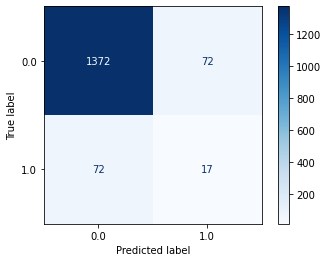

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import f1_score

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model=DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='binary'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='binary')) 
sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='binary')
print('Specificity : ',spec)
print('F1 Score : ',f1_score(y_test, y_pred, average='binary')) 

print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()


In [85]:
sensitivity_specificity_support(y_test,y_pred, average='binary')

(0.19101123595505617, 0.9501385041551247, None)

AUC =  0.5705748700550904


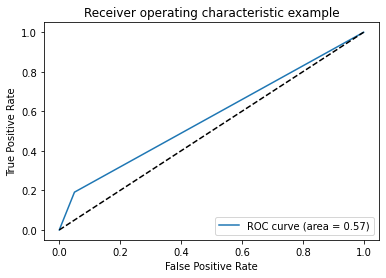

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

auc_val = roc_auc_score(y_test, y_pred)
# bisa pakai cara ini, untuk dapat AUC
print('AUC = ', auc_val)

# atau bisa pakai cara ini, untuk AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [15]:
roc_auc

0.5705748700550904

## cross validation v1

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

dt=DecisionTreeClassifier(random_state=42)
kfold = KFold(10, shuffle=True)
scores = cross_validate(dt, X, y, cv=kfold, scoring=['accuracy','precision','recall', 'f1'])

print('Accuracy : ',scores['test_accuracy'].mean())    
print('Precision : ',scores['test_precision'].mean())  
print('Recall/ sensitivity : ',scores['test_recall'].mean()) 
print('F1 : ',scores['test_f1'].mean()) 

Accuracy :  0.9068493150684931
Precision :  0.12539706017007807
Recall/ sensitivity :  0.1539781333485449
F1 :  0.13381220997258064


In [19]:
scores

{'fit_time': array([0.01566863, 0.01313567, 0.01351428, 0.01502323, 0.01487589,
        0.01513147, 0.01368117, 0.0198257 , 0.01469064, 0.01465106]),
 'score_time': array([0.00453639, 0.00409913, 0.00490665, 0.0043385 , 0.00402904,
        0.00392365, 0.00381827, 0.00478554, 0.00489402, 0.0049417 ]),
 'test_accuracy': array([0.90215264, 0.88649706, 0.90998043, 0.89041096, 0.92563601,
        0.90998043, 0.90802348, 0.8962818 , 0.90998043, 0.9295499 ]),
 'test_f1': array([0.03846154, 0.03333333, 0.17857143, 0.06666667, 0.17391304,
        0.20689655, 0.11320755, 0.07017544, 0.20689655, 0.25      ]),
 'test_precision': array([0.04545455, 0.02941176, 0.2       , 0.05882353, 0.14285714,
        0.1875    , 0.125     , 0.05405405, 0.15      , 0.26086957]),
 'test_recall': array([0.03333333, 0.03846154, 0.16129032, 0.07692308, 0.22222222,
        0.23076923, 0.10344828, 0.1       , 0.33333333, 0.24      ])}

## CV Version ver 2

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import f1_score

def dt(X_train, y_train, X_test, y_test):
  model=DecisionTreeClassifier(random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc=accuracy_score(y_test, y_pred)
  prec= precision_score(y_test, y_pred, average='binary')
  rec= recall_score(y_test, y_pred, average='binary')
  sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='binary')
  f1= f1_score(y_test, y_pred, average='binary')
  return acc, prec, rec, spec,f1



In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import numpy as np

accs, precs, recs, specs,f1s = list(), list(), list(), list(), list()
i=1
kfold = KFold(10, shuffle=True)
for train_ix, test_ix in kfold.split(X,y):
    X_train, y_train = X[train_ix], y[train_ix]
    X_test, y_test = X[test_ix], y[test_ix]
    #print(pd.DataFrame(y_test).value_counts())
    #scaling
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    acc, prec, rec, spec,f1 = dt(X_train, y_train, X_test, y_test)
    print('iteration ', i)
    print('accuracy ', acc, 'precision ', prec, 'recall ', rec, 'specificity ', spec, 'f1 ', f1)
    accs.append(acc)
    precs.append(prec)
    recs.append(rec)
    specs.append(spec)
    f1s.append(f1)
    print('-----------')
    i = i + 1

print('------')
print('Final Accuracy: %.3f' % (np.mean(accs)))
print('Final Precision: %.3f' % (np.mean(precs)))
print('Final Specificity: %.3f' % (np.mean(specs)))
print('Final Recall: %.3f' % (np.mean(recs)))
print('Final F1: %.3f' % (np.mean(f1s)))


iteration  1
accuracy  0.923679060665362 precision  0.19230769230769232 recall  0.21739130434782608 specificity  0.9569672131147541 f1  0.20408163265306123
-----------
iteration  2
accuracy  0.9119373776908023 precision  0.27586206896551724 recall  0.25 specificity  0.9561586638830898 f1  0.26229508196721313
-----------
iteration  3
accuracy  0.9256360078277887 precision  0.18181818181818182 recall  0.16666666666666666 specificity  0.9630390143737166 f1  0.17391304347826086
-----------
iteration  4
accuracy  0.9041095890410958 precision  0.2 recall  0.14705882352941177 specificity  0.9580712788259959 f1  0.16949152542372883
-----------
iteration  5
accuracy  0.9060665362035225 precision  0.02857142857142857 recall  0.06666666666666667 specificity  0.9314516129032258 f1  0.04
-----------
iteration  6
accuracy  0.913894324853229 precision  0.07407407407407407 recall  0.09523809523809523 specificity  0.9489795918367347 f1  0.08333333333333333
-----------
iteration  7
accuracy  0.909980430

## Stratified CV ver 1

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

dt=DecisionTreeClassifier(random_state=42)
scores = cross_validate(dt, X, y, cv=10, scoring=['accuracy','precision','recall','f1'])

print('Accuracy : ',scores['test_accuracy'].mean())    
print('Precision : ',scores['test_precision'].mean())  
print('Recall/ sensitivity : ',scores['test_recall'].mean()) 
print('F1 : ',scores['test_f1'].mean())  

Accuracy :  0.9129158512720157
Precision :  0.1520416970014113
Recall/ sensitivity :  0.1726666666666667
F1 :  0.1596357449098163


## stratified CV ver 2

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support

def dt(X_train, y_train, X_test, y_test):
  model=DecisionTreeClassifier(random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc=accuracy_score(y_test, y_pred)
  prec= precision_score(y_test, y_pred, average='binary')
  rec= recall_score(y_test, y_pred, average='binary')
  sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='binary')
  f1= f1_score(y_test, y_pred, average='binary')
  return acc, prec, rec, spec,f1

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import numpy as np


accs, precs, recs, specs, f1s = list(), list(), list(), list(), list()
i=1
kfold = StratifiedKFold(10)
for train_ix, test_ix in kfold.split(X,y):
    X_train, y_train = X[train_ix], y[train_ix]
    X_test, y_test = X[test_ix], y[test_ix]
    #print(pd.DataFrame(y_test).value_counts())
    #scaling
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    acc, prec, rec, spec, f1 = dt(X_train, y_train, X_test, y_test)
    print('iteration ', i)
    print('accuracy ', acc, 'precision ', prec, 'recall ', rec, 'specificity ', spec, 'f1 ', f1)
    accs.append(acc)
    precs.append(prec)
    recs.append(rec)
    specs.append(spec)
    f1s.append(f1)
    print('-----------')
    i = i + 1

print('------')
print('Final Accuracy: %.3f' % (np.mean(accs)))
print('Final Precision: %.3f' % (np.mean(precs)))
print('Final Specificity: %.3f' % (np.mean(specs)))
print('Final Recall: %.3f' % (np.mean(recs)))
print('Final F1: %.3f' % (np.mean(f1s)))

iteration  1
accuracy  0.9119373776908023 precision  0.16666666666666666 recall  0.2 specificity  0.948559670781893 f1  0.1818181818181818
-----------
iteration  2
accuracy  0.913894324853229 precision  0.08695652173913043 recall  0.08 specificity  0.9567901234567902 f1  0.08333333333333333
-----------
iteration  3
accuracy  0.9060665362035225 precision  0.17142857142857143 recall  0.24 specificity  0.9403292181069959 f1  0.19999999999999998
-----------
iteration  4
accuracy  0.9099804305283757 precision  0.13793103448275862 recall  0.16 specificity  0.948559670781893 f1  0.14814814814814817
-----------
iteration  5
accuracy  0.8962818003913894 precision  0.13157894736842105 recall  0.2 specificity  0.9320987654320988 f1  0.1587301587301587
-----------
iteration  6
accuracy  0.9041095890410958 precision  0.14705882352941177 recall  0.2 specificity  0.9403292181069959 f1  0.16949152542372883
-----------
iteration  7
accuracy  0.913894324853229 precision  0.1935483870967742 recall  0.24 

## grid search

{'criterion': 'gini', 'max_depth': 15}
DecisionTreeClassifier(max_depth=15, random_state=42)
Accuracy :  0.9125896934116112
Precision :  0.2289156626506024
Recall/ sensitivity :  0.21348314606741572
F1 :  0.2209302325581395
Specificity :  0.9556786703601108
Confusion matrix :
[[1380   64]
 [  70   19]]
Plot Confusion Matrix :


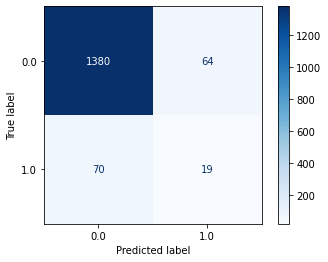

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
#scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

dt=DecisionTreeClassifier(random_state=42)

grid_values = {'max_depth': [3, 15, 20, 40, 60],'criterion':['gini', 'entropy' ]}
grid_dt = GridSearchCV(dt, param_grid = grid_values,scoring = 'recall', cv=10)
grid_dt.fit(X_train, y_train)
#Predict values based on new parameters
y_pred = grid_dt.predict(X_test)
#best hyperparameters
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='binary'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='binary')) 
print('F1 : ',f1_score(y_test, y_pred, average='binary')) 
sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='binary')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_dt, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()


## randomized search

{'max_depth': 15, 'criterion': 'gini'}
DecisionTreeClassifier(max_depth=15, random_state=42)
Accuracy :  0.9125896934116112
Precision :  0.2289156626506024
Recall/ sensitivity :  0.21348314606741572
F1 :  0.2209302325581395
Specificity :  0.9556786703601108
Confusion matrix :
[[1380   64]
 [  70   19]]
Plot Confusion Matrix :


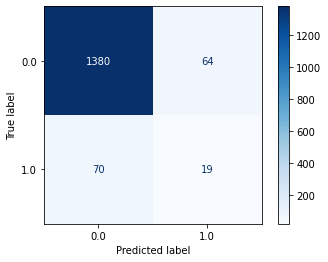

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import random

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
#scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

dt=DecisionTreeClassifier(random_state=42)
rand_values = {'max_depth': [3, 15, 20, 40, 60],'criterion':['gini', 'entropy' ]}
rand_dt = RandomizedSearchCV(dt, param_distributions = rand_values,scoring = 'recall', cv=10, n_iter=3, random_state=42)
rand_dt.fit(X_train, y_train)

#Predict values based on new parameters
y_pred = rand_dt.predict(X_test)
#best hyperparameters
print(rand_dt.best_params_)
print(rand_dt.best_estimator_)
print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='binary'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='binary')) 
print('F1 : ',f1_score(y_test, y_pred, average='binary')) 
sens, spec, sp = sensitivity_specificity_support(y_test,y_pred, average='binary')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(rand_dt, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## model selection

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline, make_pipeline
#from imblearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
'''
#contoh penggunaan Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('scaling', StandardScaler()), 
                           ('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', SMOTE()),
                           ('classifier', DecisionTreeClassifier(random_state=42, max_depth=10))])
'''
# Construct some pipelines
pipe_dt = Pipeline(steps=[('scaling',StandardScaler()), 
                          ('classifier', DecisionTreeClassifier
                           (random_state=42, max_depth=15, criterion='gini'))])
pipe_knn = Pipeline(steps=[('scaling',StandardScaler()), 
                          ('classifier', KNeighborsClassifier())])
pipe_lr = Pipeline(steps=[('scaling',StandardScaler()), 
                          ('classifier', LogisticRegression(random_state=42))])
pipe_rf = Pipeline(steps=[('scaling',StandardScaler()), 
                          ('classifier', RandomForestClassifier(random_state=42))])
pipe_svc = Pipeline(steps=[('scaling',StandardScaler()), 
                          ('classifier', SVC(random_state=42))])
pipe_bag = Pipeline(steps=[('scaling',StandardScaler()), 
                          ('classifier', BaggingClassifier(random_state=42))])


pipes = [pipe_dt, pipe_knn, pipe_lr, pipe_rf, pipe_svc, pipe_bag]
names_pipes = ['DT','KNN','LR','RF','SVM','Bagging']

for i in range(len(pipes)):
  print(names_pipes[i])
  pipes[i].fit(X_train, y_train)
  y_pred = pipes[i].predict(X_test)
  print('Accuracy : ',accuracy_score(y_test, y_pred))    
  print('Precision : ',precision_score(y_test, y_pred, average='binary'))  
  print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='binary')) 
  print('F1 : ',f1_score(y_test, y_pred, average='binary')) 
  sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='binary')
  print('Specificity : ',spec)
  print('--------')
  print('')



DT
Accuracy :  0.9125896934116112
Precision :  0.2289156626506024
Recall/ sensitivity :  0.21348314606741572
F1 :  0.2209302325581395
Specificity :  0.9556786703601108
--------

KNN
Accuracy :  0.9406392694063926
Precision :  0.25
Recall/ sensitivity :  0.011235955056179775
F1 :  0.02150537634408602
Specificity :  0.9979224376731302
--------

LR
Accuracy :  0.9419439008480104
Precision :  0.0
Recall/ sensitivity :  0.0
F1 :  0.0
Specificity :  1.0
--------

RF
Accuracy :  0.9406392694063926
Precision :  0.0
Recall/ sensitivity :  0.0
F1 :  0.0
Specificity :  0.9986149584487535
--------

SVM
Accuracy :  0.9419439008480104
Precision :  0.0
Recall/ sensitivity :  0.0
F1 :  0.0
Specificity :  1.0
--------

Bagging
Accuracy :  0.9334637964774951
Precision :  0.11764705882352941
Recall/ sensitivity :  0.02247191011235955
F1 :  0.03773584905660377
Specificity :  0.989612188365651
--------



# Confusion matrix (contoh sederhana)

### balanced dataset

In [32]:
y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,0,0,0,0,1,1,1,1,1]

y_test = y_true
print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='binary'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='binary')) 
print('F1 : ',f1_score(y_test, y_pred, average='binary')) 
sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='binary')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))


Accuracy :  1.0
Precision :  1.0
Recall/ sensitivity :  1.0
F1 :  1.0
Specificity :  1.0
Confusion matrix :
[[5 0]
 [0 5]]


In [33]:
y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [1,0,0,0,0,0,0,0,1,1]

y_test = y_true
print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='binary'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='binary')) 
print('F1 : ',f1_score(y_test, y_pred, average='binary')) 
sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='binary')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))

Accuracy :  0.6
Precision :  0.6666666666666666
Recall/ sensitivity :  0.4
F1 :  0.5
Specificity :  0.8
Confusion matrix :
[[4 1]
 [3 2]]


### imbalanced dataset

In [34]:


y_true = [0,0,0,0,0,0,0,0,1,1]
y_pred = [1,1,0,0,0,0,0,0,0,1]

y_test = y_true
print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='binary'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='binary')) 
print('F1 : ',f1_score(y_test, y_pred, average='binary')) 
sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='binary')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))

Accuracy :  0.7
Precision :  0.3333333333333333
Recall/ sensitivity :  0.5
F1 :  0.4
Specificity :  0.75
Confusion matrix :
[[6 2]
 [1 1]]


# Evaluation metrics for regression

In [35]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/kc_house_data.csv', delimiter=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df_X = df.drop(['id', 'date','price'], axis=1)
df_y = df['price']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

print('coef of determination training ', rf.score(X_train, y_train))
print('coef of determination testing ', rf.score(X_test, y_test))

print('prediction')
y_pred = rf.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[0:10])

coef of determination training  0.9817419148462312
coef of determination testing  0.8578742588446702
prediction
[ 385061.5   875414.01 1132820.9  2158089.    713092.3   246939.99
  846984.49  628537.49  398242.35  536181.4 ]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]


In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from scipy import stats
import numpy as np
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
#pakai scipy, cara 1
pearson_r, pval = stats.pearsonr(y_test, y_pred)
#pakai numpy, cara 2
r = np.corrcoef(y_test, y_pred)
print('rmse : ', rmse)
print('r2 :', r2)
print('mae : ', mae)
print('pearson r : ', pearson_r)
print('pearson r : ', r[0,1])

rmse :  143241.75474042213
r2 : 0.8578742588446702
mae :  73646.09158989895
pearson r :  0.926220748999251
pearson r :  0.9262207489992507


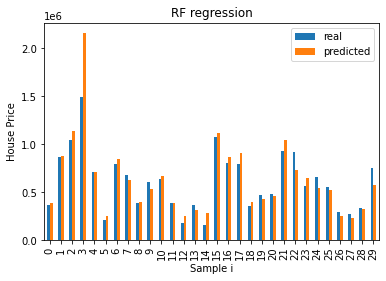

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


data1 = pd.DataFrame(y_test[:30], columns = ['real'])
data2 = pd.DataFrame(y_pred[:30], columns = ['predicted'])
df_new = pd.concat([data1, data2], axis=1) 
df_new.plot(kind='bar') 

plt.title("RF regression")
plt.xlabel('Sample i') 
plt.ylabel('House Price') 

plt.show()